In [68]:
#import modules and functions

import mlflow
from mlflow.models import infer_signature

import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, r2_score

In [48]:
# Load the CSV from filepath

folder_path = 'C:\BANA7075 Final Project\csv Merged Data'  # or replace with your target folder

# Prefix you're looking for
prefix = 'hamilton'

files = os.listdir(folder_path)
csv_files = [f for f in files if f.startswith(prefix) and f.endswith('.csv')]

if csv_files:
    file_path = os.path.join(folder_path, csv_files[0])
    print(f"Loaded: {file_path}")
else:
    print("No matching CSV files found.")


Loaded: C:\BANA7075 Final Project\csv Merged Data\hamilton_zip_merge__hamilton_20250422_222639__redfin_20250422_222948__created_20250422_233455.csv


In [85]:
#Feature Engineering

#Load data
df = pd.read_csv(file_path)

#Define target and features
target = 'Estimated_Days_On_Market'  # replace with actual column name
planned_features = ['saleamount','Year Built', '# Bedrooms', '# Full Bathrooms','# Half Bathrooms','Acreage', 'Finished Square Footage', 'Basement Type']
df = df.dropna(subset=planned_features) #drop incomplete rows
df = df.dropna(subset=[target]) #drop incomplete rows
X = df.drop(columns=[target]) #drop the target row 
y = df[target] #create a y value with target column


#print(X.columns)

#Basement Type Encoded
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Fit and transform the column (needs to be 2D)
encoded = encoder.fit_transform(X[['Basement Type']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Basement Type']))
encoded_df.index = X.index
X = pd.concat([X.drop(columns=['Basement Type']), encoded_df], axis=1)
#print(X.columns)
#Combine Bathrooms into one number
X['# Bathrooms'] = X['# Full Bathrooms'] + ((X['# Half Bathrooms'])/2)

features = ['saleamount','Year Built', '# Bedrooms', '# Bathrooms','Acreage', 'Finished Square Footage', 'Basement Type_Full Basement', 'Basement Type_Full Crawl','Basement Type_Part Basement', 'Basement Type_Part Crawl']

X = X[features].select_dtypes(include='number')
print(features)


['saleamount', 'Year Built', '# Bedrooms', '# Bathrooms', 'Acreage', 'Finished Square Footage', 'Basement Type_Full Basement', 'Basement Type_Full Crawl', 'Basement Type_Part Basement', 'Basement Type_Part Crawl']


In [90]:
# features = ['Year Built 6', '# Bedrooms 8', '# Bathrooms 7','Acreage 4', 'Finished Square Footage 7', 'Basement Type_Full Basement 5', 'Basement Type_Full Crawl 3', 'Basement Type_None 3', 'Basement Type_Part Basement 3', 'Basement Type_Part Crawl 3']


In [130]:
#This is where the model models

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model hyperparameters
params = {
    "random_state": 42,
    "max_depth": 5,
    "min_samples_leaf": 40,
}

#Create a pipeline: scale features and train a decision tree regressor
model = Pipeline(steps=[('regressor', DecisionTreeRegressor(**params))])

#Train the model
model.fit(X_train, y_train)

#Predict and evaluate
preds = model.predict(X_val)
mae = mean_absolute_error(y_val, preds)
r2 = r2_score(y_val, preds)

print(f'Mean Absolute Error: {mae:.2f}')
print(y_val)
print(preds)
print(f'r_squared: {r2:.2f}')


Mean Absolute Error: 7.00
525    60.0
509    56.0
49     53.0
398    43.0
156    67.0
       ... 
439    56.0
656    51.0
309    50.0
495    60.0
4      65.0
Name: Estimated_Days_On_Market, Length: 81, dtype: float64
[50.50704225 50.50704225 50.50704225 50.50704225 73.04444444 59.88461538
 50.50704225 50.50704225 59.88461538 73.04444444 52.         59.88461538
 73.04444444 56.13333333 73.04444444 50.50704225 59.88461538 59.88461538
 50.50704225 59.88461538 50.50704225 50.50704225 59.88461538 52.
 50.50704225 53.58536585 53.58536585 52.         56.13333333 53.58536585
 52.         59.88461538 59.88461538 59.88461538 52.         53.58536585
 50.50704225 52.         50.50704225 52.         59.88461538 73.04444444
 53.58536585 59.88461538 50.50704225 56.13333333 53.58536585 53.58536585
 73.04444444 50.50704225 59.88461538 73.04444444 52.         50.50704225
 59.88461538 59.88461538 50.50704225 53.58536585 50.50704225 50.50704225
 59.88461538 73.04444444 59.88461538 53.58536585 53.58536585 

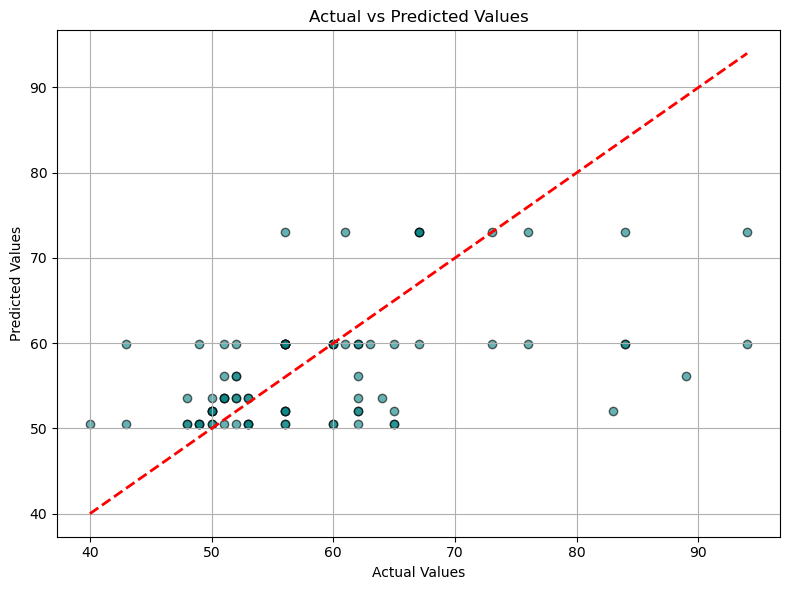

In [127]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, preds, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


# Manual Tuning for DEV ONLY

In [189]:
#regressor = DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, random_state=42)
#
#model = Pipeline(steps=[('regressor', regressor)])
#
#model.fit(X_train, y_train)
#preds = model.predict(X_val)
#mae = mean_absolute_error(y_val, preds)
#print(f'Tuned MAE: {mae:.2f}')
#print(preds)

# Visualizer

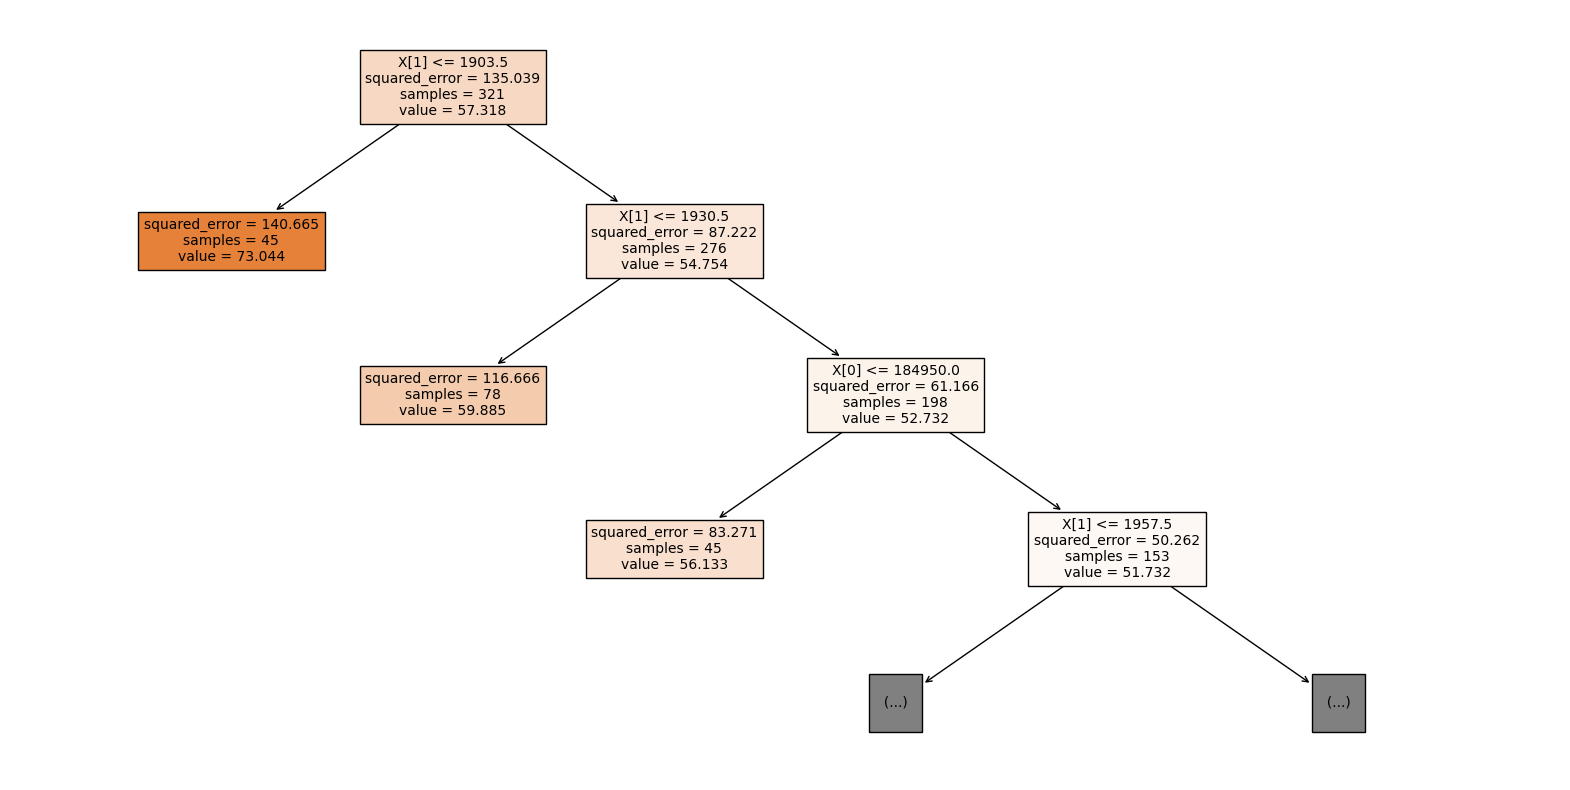

In [128]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the trained decision tree from the pipeline
regressor = model.named_steps['regressor']

# Plot it
plt.figure(figsize=(20,10))
plot_tree(
    regressor,
    filled=True,
    fontsize=10,
    max_depth=3  # limit depth for readability
)
plt.show()


# ML Flow Log

In [65]:
mlflow.set_tracking_uri(uri="http://<host>:<port>")

In [131]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Machine Learning Design Group 1")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("r_squared", r2)
    mlflow.log_metric("Mean Absolute Error", mae)


    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("MVP", "First test of ML Flow with model")

    # Infer the model signature
    signature = infer_signature(X_train, model.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="housing_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="DOM-predictor",
    )

C:\Users\schri\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/04/23 00:11:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\schri\AppData\Local\Temp\tmp1sq0ucx8\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-lear

Registered model 'DOM-predictor' already exists. Creating a new version of this model...
2025/04/23 00:11:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DOM-predictor, version 9


🏃 View run calm-trout-893 at: http://127.0.0.1:8080/#/experiments/1/runs/12cd43ce0249438a8ae362009fcafa24
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1


Created version '9' of model 'DOM-predictor'.


# Load the Model

In [ ]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

iris_feature_names = datasets.load_iris().feature_names

result = pd.DataFrame(X_test, columns=iris_feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

result[:4]